In [25]:
import pandas as pd
import numpy as np
import cufflinks as cf
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import warnings
import plotly.express as px
import seaborn as sns

init_notebook_mode(connected=True)
warnings.filterwarnings('ignore')
cf.go_offline()

You have been provided with data from the Titanic Passenger Roaster, depicting if an individual survived the sinking of the ship or not. ‘Survived’ is denoted by (1) and ‘Did Not Survive’ is denoted by (0). Only using Plotly, graph the following information from the data. Feel free to use any of the Plotly submodules discussed (graph_objects, plotly express or iplot). Remember to label your axis and name your plots appropriately. For each given question, only one figure is expected.
1. Show the age distribution in the data using a histogram.
2. Show the age distribution based on gender using a histogram.
3. Using the function df.corr() to identify the correlation within the data, represent its results using a form of a matrix plot.
4. Pivot the data setting the column Pclass as the columns and Fare as the values. From the resulting structure, use a boxplot to show the distribution of the values in its 3 columns.
5. Graph the value counts of the number of passengers who survived and did not survive based on gender using a stacked bar graph.
6. Using a scatter plot, plot the ages to the fare paid by the each passenger based on their gender.
7. Plot a bubble plot of the ages to the fare paid by each passenger categorizing whether they survived or not. The size of each bubble should be determined by the passenger class and the name of each individual as the hover name.

In [2]:
df=pd.read_csv("Titanic Data.csv")

pd.set_option('display.max_columns', None)
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

# Show the age distribution in the data using a histogram.

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

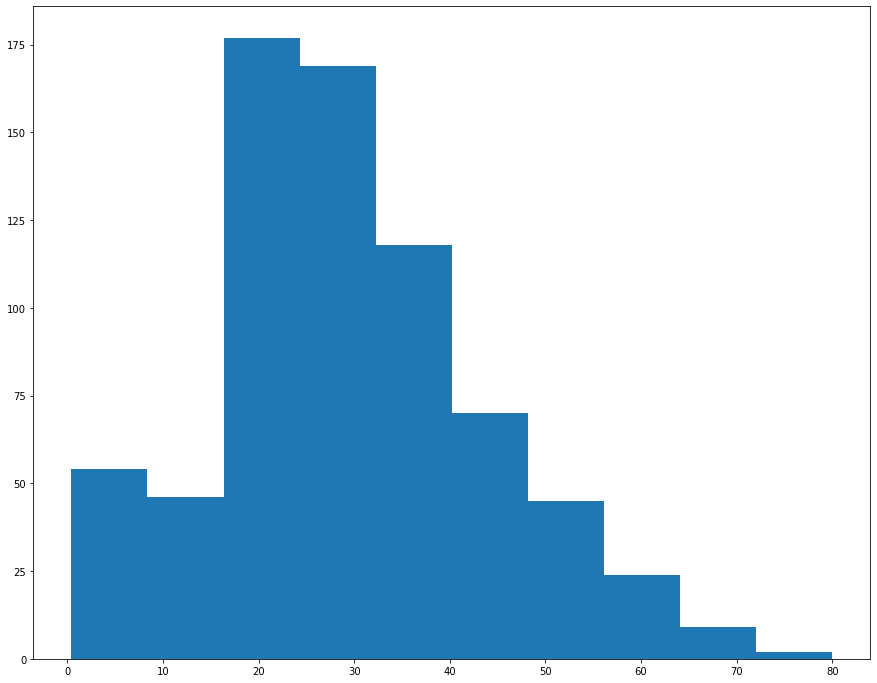

In [4]:
plt.figure(figsize=(15, 12))
plt.hist(df['Age'])

In [29]:
px.histogram(df, x='Age', nbins=20, opacity=0.7)

# Show the age distribution based on gender using a histogram.

In [30]:
#df.Sex.unique

df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [8]:
df['male_Age']= df[df['Sex']=='male']['Age']
df['female_Age']= df[df['Sex']=='female']['Age']

In [9]:
df['male_Age']

0      22.0
1       NaN
2       NaN
3       NaN
4      35.0
       ... 
886    27.0
887     NaN
888     NaN
889    26.0
890    32.0
Name: male_Age, Length: 891, dtype: float64

In [32]:
df[['male_Age', 'female_Age']].iplot(kind='histogram', bins=20, xTitle='Ages', yTitle='Count')

In [33]:
px.histogram(df, x='Age', nbins=20, color='Sex', opacity=0.75)

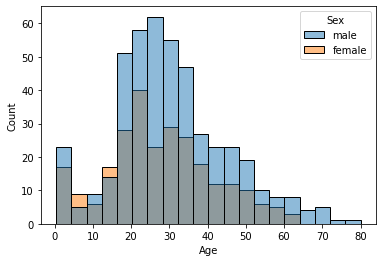

In [36]:
sns.histplot(data= df, x='Age', hue='Sex')

# Using the function df.corr() to identify the correlation within the data, represent its results using a form of a matrix plot.

In [12]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male_Age,female_Age
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.006191,0.085899
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.119618,0.116109
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.392754,-0.386217
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,1.000000,1.000000
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.334982,-0.241442
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.232419,-0.118539
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.077331,0.171468
male_Age,0.006191,-0.119618,-0.392754,1.000000,-0.334982,-0.232419,0.077331,1.000000,NaN
female_Age,0.085899,0.116109,-0.386217,1.000000,-0.241442,-0.118539,0.171468,NaN,1.000000


In [13]:
#heatmap 

In [37]:
px.imshow(df.corr(), title='Feature correlation Matrix')

In [38]:
df.corr().iplot(kind='heatmap', colorscale='Greens', title='Feature Correlation Matrix')

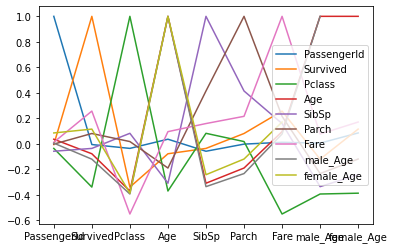

In [16]:
df.corr().plot()

# Pivot the data setting the column Pclass as the columns and Fare as the values. From the resulting structure, use a boxplot to show the distribution of the values in its 3 columns.

In [17]:
df[['Pclass','Fare']].pivot(columns='Pclass', values='Fare')

Pclass,1,2,3
0,NaN,NaN,7.250
1,71.2833,NaN,NaN
2,NaN,NaN,7.925
3,53.1000,NaN,NaN
4,NaN,NaN,8.050
...,...,...,...
886,NaN,13.0,NaN
887,30.0000,NaN,NaN
888,NaN,NaN,23.450
889,30.0000,NaN,NaN


In [39]:
df[['Pclass','Fare']].pivot(columns='Pclass', values='Fare').iplot(kind='box')

In [40]:
px.box(df, x='Pclass', y='Fare')

# Graph the value counts of the number of passengers who survived and did not survive based on gender using a stacked bar graph.

In [41]:
survived_sex=df[df['Survived']==1]['Sex'].value_counts()

dead_sex=df[df['Survived']==0]['Sex'].value_counts()

df1=pd.DataFrame([survived_sex, dead_sex])

df1.index=['Survived', 'Dead']

px.bar(df1, barmode='stack', title='Survival by Sex')

In [42]:
df1.iplot(kind='bar', barmode='stack')

# Using a scatter plot, plot the ages to the fare paid by the each passenger based on their gender.

In [43]:
df.iplot(kind='scatter', x='Age', y='Fare', categories='Sex')

In [44]:
px.scatter(df, x='Age', y='Fare', color='Sex')

# Plot a bubble plot of the ages to the fare paid by each passenger categorizing whether they survived or not. The size of each bubble should be determined by the passenger class and the name of each individual as the hover name.

In [45]:
df[['Survived']]=df[['Survived']].astype('float64', copy=False)

df.iplot(kind='bubbles', x='Fare', y='Age', categories='Survived', size='Pclass', text='Name')

In [46]:
px.scatter(df, x='Fare', y='Age', color='Survived', size='Pclass', hover_name='Name')